In [3]:
!python --version

Python 3.10.8


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Import data frame and Show Top 5 rows of dataset.**

In [5]:
data = pd.read_csv('ecommerce_dataset.csv')
data.head()

,transaction_id,store,customer_id,customer_city,customer_gender,product_id,product_price,quantity,total,created_at
0,169483,Ofline store,300726,Jakarta,Male,34,1088,64,69632,2018-07-06 18:02:28.000000 UTC
1,262286,Ofline store,186646,Tangerang,Male,34,1088,64,69632,2018-08-27 17:07:31.000000 UTC
2,338083,Ofline store,257168,Depok,Female,34,1088,64,69632,2018-09-28 14:50:06.000000 UTC
3,311059,Ofline store,190587,Depok,Male,34,1088,4,4352,2018-09-17 16:21:23.000000 UTC
4,456382,Ofline store,314798,Depok,Male,34,1088,4,4352,2018-10-31 18:20:07.000000 UTC


## **Show the last 5 rows of dataset**

In [6]:
data.tail()

,transaction_id,store,customer_id,customer_city,customer_gender,product_id,product_price,quantity,total,created_at
48568,463122,Online store,127691,Depok,Female,49,818,62,50716,2018-11-01 19:54:38.000000 UTC
48569,527161,Online store,160838,Depok,Female,49,818,62,50716,2018-11-15 07:24:45.000000 UTC
48570,775139,Online store,438662,Jakarta,Female,49,818,62,50716,2018-12-28 14:59:12.000000 UTC
48571,750554,Online store,285030,Depok,Male,49,818,62,50716,2018-12-18 08:52:34.000000 UTC
48572,638625,Online store,395567,Jakarta,Female,49,818,62,50716,2018-12-02 05:24:20.000000 UTC


## **Check shape of the dataset.**

In [7]:
data.shape

print('Jumlah Rows =', data.shape[0])
print('Jumlah Columns =', data.shape[1])

Jumlah Rows = 48573
Jumlah Columns = 10


## **Check all information about dataset**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48573 entries, 0 to 48572
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   transaction_id   48573 non-null  int64 
 1   store            48573 non-null  object
 2   customer_id      48573 non-null  int64 
 3   customer_city    48573 non-null  object
 4   customer_gender  48573 non-null  object
 5   product_id       48573 non-null  int64 
 6   product_price    48573 non-null  int64 
 7   quantity         48573 non-null  int64 
 8   total            48573 non-null  int64 
 9   created_at       48573 non-null  object
dtypes: int64(6), object(4)
memory usage: 3.7+ MB


## **Change data type of created_at columns from object to datetime.**

In [9]:
data['created_at'] = pd.to_datetime(data['created_at'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48573 entries, 0 to 48572
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   transaction_id   48573 non-null  int64              
 1   store            48573 non-null  object             
 2   customer_id      48573 non-null  int64              
 3   customer_city    48573 non-null  object             
 4   customer_gender  48573 non-null  object             
 5   product_id       48573 non-null  int64              
 6   product_price    48573 non-null  int64              
 7   quantity         48573 non-null  int64              
 8   total            48573 non-null  int64              
 9   created_at       48573 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(6), object(3)
memory usage: 3.7+ MB


## **Check Null values**

In [11]:
data.isnull().sum()

transaction_id     0
store              0
customer_id        0
customer_city      0
customer_gender    0
product_id         0
product_price      0
quantity           0
total              0
created_at         0
dtype: int64

## **Check any duplicate or not.**

In [12]:
data_dup = data.duplicated().any()
print('Terdapat data duplikat = ', data_dup)

Terdapat data duplikat =  False


## **Get statistic about the dataset**

In [13]:
data.describe()

,transaction_id,customer_id,product_id,product_price,quantity,total
count,48573.000000,48573.000000,48573.000000,48573.000000,48573.000000,48573.000000
mean,432642.098017,275710.635147,47.816915,1428.726309,50.658432,72228.887757
std,202269.186105,105987.363157,9.905970,568.139930,28.380385,52506.038467
min,90530.000000,233.000000,16.000000,336.000000,1.000000,472.000000
25%,267007.000000,182640.000000,39.000000,818.000000,27.000000,30208.000000
50%,414494.000000,287484.000000,49.000000,1656.000000,51.000000,60265.000000
75%,614049.000000,370103.000000,51.000000,1888.000000,75.000000,104625.000000
max,783536.000000,441318.000000,97.000000,2439.000000,100.000000,243900.000000


# **Corellation matrix**

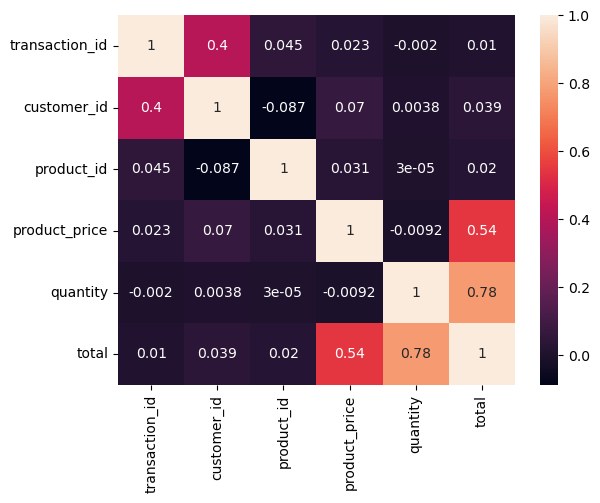

In [14]:
sns.heatmap(data.corr(), annot = True);

## **Show data Male only**

In [17]:
ds_1 = data[data['customer_gender'].str.contains('Male')]
ds_1

,transaction_id,store,customer_id,customer_city,customer_gender,product_id,product_price,quantity,total,created_at
0,169483,Ofline store,300726,Jakarta,Male,34,1088,64,69632,2018-07-06 18:02:28+00:00
1,262286,Ofline store,186646,Tangerang,Male,34,1088,64,69632,2018-08-27 17:07:31+00:00
3,311059,Ofline store,190587,Depok,Male,34,1088,4,4352,2018-09-17 16:21:23+00:00
4,456382,Ofline store,314798,Depok,Male,34,1088,4,4352,2018-10-31 18:20:07+00:00
7,321799,Ofline store,141261,Depok,Male,39,1888,72,135936,2018-09-21 13:05:27+00:00
...,...,...,...,...,...,...,...,...,...,...
48563,440637,Online store,168345,Depok,Male,49,818,62,50716,2018-10-28 17:01:35+00:00
48565,755014,Online store,434618,Bogor,Male,49,818,62,50716,2018-12-20 07:15:10+00:00
48566,502922,Online store,145073,Jakarta,Male,49,818,62,50716,2018-11-09 19:24:41+00:00
48567,104282,Online store,231111,Depok,Male,49,818,62,50716,2018-05-20 01:30:00+00:00


## **Show city in the dataset**

In [15]:
ds_2 = data['customer_city']
ds_2.head()



0      Jakarta
1    Tangerang
2        Depok
3        Depok
4        Depok
Name: customer_city, dtype: object

## **Check total of data from all columns**

In [16]:
ds_3 = data['total']
ds_3.head()

0    69632
1    69632
2    69632
3     4352
4     4352
Name: total, dtype: int64

In [19]:
#barViz = range(len(ds_2))
#plt.bar(ds_2, ds_3);

In [20]:
#plt.bar(barViz, ds_3);